In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import re
import requests as r
import tweepy
from datetime import datetime
from functools import reduce
import sqlite3
import glob
import requests
from PIL import Image
from io import BytesIO
%matplotlib inline

### Gathring information

In [161]:
archive = pd.read_csv('twitter-archive-enhanced.csv')


In [162]:
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(URL)

with open(os.path.join(os.getcwd(), URL.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
image_pre = pd.read_csv('image-predictions.tsv',sep='\t')


In [163]:
tweet = pd.read_json('tweet-json.zip',lines =True)

In [164]:
image_pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [165]:
# save to local file 
consumer_key = 'your consumer key'
consumer_secret = 'your secret key'
access_token = 'your access token'
access_token_secret = 'your secret access tone'

#Connecting to API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
API = tweepy.API(auth)

In [166]:
# Store data on tweet_json.txt
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweets_data, outfile)
    

In [167]:
archive


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


## Accessing data

In [168]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [169]:
image_pre.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [170]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

##### Quality Issues
1 - Retweets: Some entries are retweets,We want to keep only the original.

2 - Name: replace with 'None' that rows where the value of 'name' is lowercase indicating that it's not an actual name.

3 - wrong format for tweet_id

4- Wrong data type: timestamp should be datetime instead of object.

5 - missing column for the fraction of rating_numerator and rating_denominator

6 - rename function to rename the column 'id' to 'tweet_id'

7- Rename column p1 and p2 and p3 to be clear

8- Missing value in table twitter_Archive in in_reply_to_status_id and in_reply_to_user_id


##### Tidiness Issues
1- Join image_predictions and df_tweet to twitter_archive.

2- merge one variable in four columns (doggo, floofer, pupper, puppo).



### Clean Data

In [171]:
# Copy dataframes
df_clean_archive = archive.copy()
df_clean_image_pre = image_pre.copy()
df_clean_tweets = tweet_json.copy()

# Quality Issues


### Define
Retweets: Some entries are retweets, keep the original.


In [172]:
### code
df_clean_archive= df_clean_archive[df_clean_archive.retweeted_status_id.isna()]

df_clean_archive = df_clean_archive.drop(['retweeted_status_id'], axis = 1)


In [173]:
### Test 
df_clean_archive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 288.9+ KB


### Define
replace with 'None' that rows where the value of 'name' is lowercase indicating that it's not an actual name.

In [174]:
### Code 
no_name_rows = df_clean_archive.loc[(df_clean_archive['name'].str.islower())]
no_name_list = no_name_rows['text'].tolist()

#replace "None" where name is lowercase
for i in no_name_list:
    df_clean_archive.loc[df_clean_archive.text == i, 'name'] = "None"

In [175]:
### Test 
df_clean_archive['name'].value_counts()

None         784
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Lola           8
Winston        8
Sadie          8
Daisy          7
Toby           7
Bella          6
Bo             6
Jax            6
Bailey         6
Oscar          6
Stanley        6
Koda           6
Scout          5
Dave           5
Louis          5
Leo            5
Chester        5
Milo           5
Rusty          5
Bentley        5
Buddy          5
Gus            4
Sophie         4
            ... 
Maxwell        1
Dobby          1
Carter         1
Dale           1
Lassie         1
Lipton         1
Bloop          1
BeBe           1
Blu            1
Travis         1
Ginger         1
Barney         1
Banjo          1
Flash          1
Alexander      1
Herb           1
Brian          1
Smiley         1
Nollie         1
Strider        1
Carbon         1
Gunner         1
Biden          1
Kramer         1
Wishes         1
Ozzie          1
Bungalo        1
Levi          

### Define
Convert type from object to datetime.



In [176]:
### code
df_clean_archive.timestamp = pd.to_datetime(df_clean_archive.timestamp)


In [177]:
### Test
df_clean_archive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 288.9+

### Define
missing column for the fraction of rating_numerator and rating_denominato

In [178]:
###Code
ratings = df_clean_archive.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings = ratings.astype('float')
df_clean_archive.rating_numerator = ratings
df_clean_archive['fraction'] = df_clean_archive['rating_numerator'].astype(float)/df_clean_archive['rating_denominator']

In [179]:
### Test
df_clean_archive['fraction'].value_counts()


1.200000      504
1.000000      444
1.100000      431
1.300000      307
0.900000      156
0.800000       98
0.700000       53
1.400000       43
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        7
42.000000       2
0.000000        2
66.600000       1
1.500000        1
inf             1
1.250000        1
0.950000        1
177.600000      1
0.975000        1
0.636364        1
18.200000       1
0.733333        1
1.126000        1
1.350000        1
0.818182        1
1.700000        1
3.428571        1
1.127000        1
Name: fraction, dtype: int64

### Define
rename column(p1,p2,p3)


In [180]:
### code
df_clean_archive.rename(index=str, columns= {"p1" :"prediction 1" , "p2" :"prediction 2" ,  "p3" :"prediction 3"} , inplace = True )

In [181]:
### test
df_clean_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,fraction
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,1.2


### Define 
rename cloumn id

In [182]:
### code
df_clean_archive.rename(columns = {'id':'tweet_id'}, inplace=True)


In [183]:
### test
df_clean_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,fraction
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,1.3


### Define
drop unwanted cloumn

In [184]:
### code
df_clean_archive = df_clean_archive.drop(['in_reply_to_status_id','in_reply_to_user_id', 'source', 'expanded_urls' ] , axis = 1)




In [185]:
### test 
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null datetime64[ns]
text                          2175 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
fraction                      2175 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 237.9+ KB


# Tidiness Issues

### Define
Merge twitter_archive_clean and image_predictions_clean


In [186]:
df_clean_archive = df_clean_archive.merge(df_clean_image_pre, on='tweet_id', how='inner')



In [187]:
### code
df_clean_archive = pd.merge(left=df_clean_archive, right=df_clean_tweets, left_on='tweet_id', right_on='id', how='inner')




In [188]:
### test
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 55 columns):
tweet_id                         1994 non-null int64
timestamp                        1994 non-null datetime64[ns]
text                             1994 non-null object
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
rating_numerator                 1994 non-null float64
rating_denominator               1994 non-null int64
name                             1994 non-null object
doggo                            1994 non-null object
floofer                          1994 non-null object
pupper                           1994 non-null object
puppo                            1994 non-null object
fraction                         1994 non-null float64
jpg_url                          1994 non-null object
img_num                          1994 non-null int64
p1                               1994 non-null object
p1_conf                    

### Define
Convert 'tweet_id' column from to string 



In [189]:
# code
df_clean_archive.tweet_id = df_clean_archive.tweet_id.astype(str)

In [190]:
#Test
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 55 columns):
tweet_id                         1994 non-null object
timestamp                        1994 non-null datetime64[ns]
text                             1994 non-null object
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
rating_numerator                 1994 non-null float64
rating_denominator               1994 non-null int64
name                             1994 non-null object
doggo                            1994 non-null object
floofer                          1994 non-null object
pupper                           1994 non-null object
puppo                            1994 non-null object
fraction                         1994 non-null float64
jpg_url                          1994 non-null object
img_num                          1994 non-null int64
p1                               1994 non-null object
p1_conf                   

### Define
one variable in four columns (doggo, floofer, pupper, puppo).


In [191]:
### code

df_clean_archive['dog_stage'] = df_clean_archive['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

df_clean_archive = df_clean_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


In [192]:
### test 
df_clean_archive.dtypes


tweet_id                                 object
timestamp                        datetime64[ns]
text                                     object
retweeted_status_user_id                float64
retweeted_status_timestamp               object
rating_numerator                        float64
rating_denominator                        int64
name                                     object
fraction                                float64
jpg_url                                  object
img_num                                   int64
p1                                       object
p1_conf                                 float64
p1_dog                                     bool
p2                                       object
p2_conf                                 float64
p2_dog                                     bool
p3                                       object
p3_conf                                 float64
p3_dog                                     bool
contributors                            

### Storing data

In [193]:
df_clean_archive.to_csv('cleaned_twitter.csv', index=False)


### Analyze and Visualize


In [194]:
cleaned_archive = pd.read_csv('cleaned_twitter.csv')


In [195]:
archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [196]:
df_clean_archive['source'] = df_clean_archive['source'].astype('category')
df_clean_archive['tweet_id'] = df_clean_archive['tweet_id'].astype('str')
df_clean_archive['timestamp'] = pd.to_datetime(df_clean_archive['timestamp'])

In [197]:
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 52 columns):
tweet_id                         1994 non-null object
timestamp                        1994 non-null datetime64[ns]
text                             1994 non-null object
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
rating_numerator                 1994 non-null float64
rating_denominator               1994 non-null int64
name                             1994 non-null object
fraction                         1994 non-null float64
jpg_url                          1994 non-null object
img_num                          1994 non-null int64
p1                               1994 non-null object
p1_conf                          1994 non-null float64
p1_dog                           1994 non-null bool
p2                               1994 non-null object
p2_conf                          1994 non-null float64
p2_dog                    

#### Which dog_stage received the highest ratings?


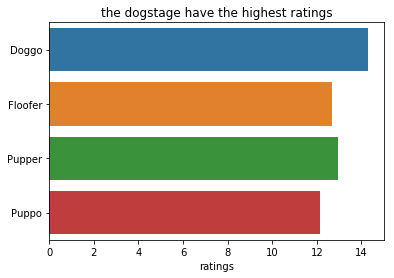

In [198]:
highest_ratings= cleaned_archive.groupby('dog_stage')['rating_numerator'].mean()

HR = list(highest_ratings)
HRI = [i.title() for i in highest_ratings.index]
u = sns.barplot(x=HR, y=HRI, label=HRI)
plt.xlabel( 'ratings')
plt.title('the dogstage have the highest ratings')
plt.show();


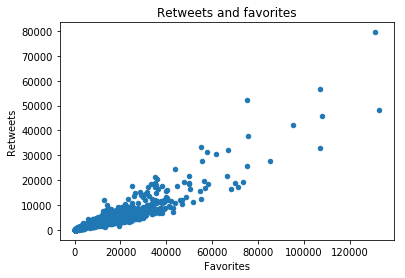

In [201]:
# Relation between favorite and retweet
cleaned_archive.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites');

### refrences 

https://github.com/AreejAlZahrani/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
    https://github.com/SandraMnz/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
    https://github.com/FedericoFin/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
    Reading from Json file: https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

JsonDecoder problem: https://stackoverflow.com/a/48154834
